In [1]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers

# Laden der Features und der Labels
features = np.load('features.npy')
labels = np.load('labels.npy')

# Auswahl der Features und Label vom Datensatz für das Trainieren
features = features[500000:530000] 
labels = labels[500000:530000]

# Die RGB-Werte(Features) müssen auf 0-1 skaliert werden
features = features/255.0

# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=features.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Das CNN lernen lassen
# batch_size = Anzahl der übertragenen Datenpakete auf einmal
# epochs = Anzahl der Durchläufe durch alle Daten
# validation_split = Aufteilen der Gesamtdaten in Trainingsdaten und Validierungsdaten(20%)
history = model.fit(features, labels, batch_size=128, epochs=8, validation_split=0.2)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 24000 samples, validate on 6000 samples
Epoch 1/8
24000/24000 [==============================] - 27s 1ms/step - loss: 0.1588 - acc: 0.9481 - val_loss: 0.0548 - val_acc: 0.9825
Epoch 2/8
24000/24000 [==============================] - 27s 1ms/step - loss: 0.0539 - acc: 0.9835 - val_loss: 0.0418 - val_acc: 0.9878
Epoch 3/8
24000/24000 [==============================] - 27s 1ms/step - loss: 0.0412 - acc: 0.9870 - val_loss: 0.0450 - val_acc: 0.9875
Epoch 4/8
24000/24000 [==============================] - 27s 1ms/step - loss: 0.0411 - acc: 0.9866 - val_loss: 0.0384 - val_acc: 0.9902
Epoch 5/8
24000/24000 [==============================] - 27s 1ms/step - loss: 0.0346 - acc: 0.9894 - val_loss: 0.0322 - val_acc: 0.9923
Epoch 6/8
24000/24000 [==============================] - 27s 1ms/step - loss: 0.0288 - acc: 0.9918 - val_loss: 0.0266 - val_acc: 0.9927
Epoch 7/8
24000

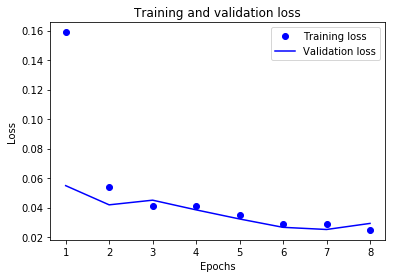

In [2]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" = Blaue Linie
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [3]:
# Zum Testen des CNN
testx = features[:10000]
testy = labels[:10000]

In [4]:
# Loss und Accuracy werden berechnet
val_loss, val_acc = model.evaluate(testx, testy)
# Ausgabe der Ergebnisse
print(val_loss, val_acc)

10000/10000 [==============================] - 4s 425us/step
0.02717282580509782 0.9922
